# Capstone Final

In [591]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (explained_variance_score,mean_absolute_error,
mean_squared_error,r2_score)
from sklearn.preprocessing import Imputer

In [592]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew

In [593]:
train_values=pd.read_csv('C:/Users/teres/Anaconda3/CapstoneProject/DataGiven/train_values.csv') # data
train_labels=pd.read_csv('C:/Users/teres/Anaconda3/CapstoneProject/DataGiven/train_labels.csv') # target
train_values_labels=pd.merge(train_values,train_labels,on='row_id',how='inner') #joined data and target (challenge 1)
test_values=pd.read_csv('C:/Users/teres/Anaconda3/CapstoneProject/DataGiven/test_values.csv') # test new data

# Data training

In [594]:
X=train_values_labels.copy()

In [595]:
# data dtypes
#X.dtypes

In [596]:
# data.head()
#print(X.head())
# print(X.shape)

In [597]:
# print(X2[X2.duplicated(keep=False)].shape)

In [598]:
#X.head()

In [599]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,3198.0,3116.985616,1830.236781,0.000000,1504.250000,3113.500000,4724.750000,6276.000000
econ__pct_civilian_labor,3198.0,0.467191,0.074400,0.207000,0.420000,0.468000,0.514000,1.000000
econ__pct_unemployment,3198.0,0.059696,0.022947,0.010000,0.044000,0.057000,0.072000,0.248000
econ__pct_uninsured_adults,3196.0,0.217463,0.067362,0.046000,0.166000,0.216000,0.261000,0.496000
econ__pct_uninsured_children,3196.0,0.086067,0.039849,0.012000,0.057000,0.077000,0.106000,0.281000
demo__pct_female,3196.0,0.498811,0.024399,0.278000,0.493000,0.503000,0.512000,0.573000
demo__pct_below_18_years_of_age,3196.0,0.227715,0.034282,0.092000,0.206000,0.226000,0.246000,0.417000
demo__pct_aged_65_years_and_older,3196.0,0.170043,0.043694,0.045000,0.141000,0.167000,0.195000,0.346000
demo__pct_hispanic,3196.0,0.090207,0.142763,0.000000,0.019000,0.035000,0.087000,0.932000
demo__pct_non_hispanic_african_american,3196.0,0.091046,0.147165,0.000000,0.006000,0.022000,0.096000,0.858000


# Checking missing values

In [600]:
# checK rest of nulls
def show_missing():
    missing = X.columns[X.isnull().any()].tolist()
    return missing
#show_missing()

In [601]:
print('Missing Data Count')
print(X[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*40)
print(round(X[show_missing()].isnull().sum().sort_values(ascending = False)/len(X)*100,2))

Missing Data Count
health__homicides_per_100k                     1967
health__pct_excessive_drinking                  978
health__pct_adult_smoking                       464
health__motor_vehicle_crash_deaths_per_100k     417
health__pop_per_dentist                         244
health__pop_per_primary_care_physician          230
health__pct_low_birthweight                     182
health__air_pollution_particulate_matter         28
demo__pct_non_hispanic_african_american           2
econ__pct_uninsured_children                      2
demo__pct_female                                  2
demo__pct_below_18_years_of_age                   2
demo__pct_aged_65_years_and_older                 2
demo__pct_hispanic                                2
health__pct_adult_obesity                         2
demo__pct_non_hispanic_white                      2
demo__pct_american_indian_or_alaskan_native       2
demo__pct_asian                                   2
health__pct_diabetes                         

# Impute missing values

In [602]:
### NaNs 'health__pct_excessive_drinking'
X['health__pct_excessive_drinking']=X['health__pct_excessive_drinking'].fillna(0)

In [603]:
### NaNs 'health__pct_adult_smoking'
imp=Imputer(missing_values='NaN',strategy='most_frequent',axis=0)
imp.fit(X[['health__pct_adult_smoking']])
X['health__pct_adult_smoking']=imp.transform(X[['health__pct_adult_smoking']]).ravel()

In [604]:
### NaNs 'health__motor_vehicle_crash_deaths_per_100k'
X['health__motor_vehicle_crash_deaths_per_100k']=X['health__motor_vehicle_crash_deaths_per_100k'].fillna(0)

In [605]:
### NaNs 'health__pct_low_birthweight'
imp=Imputer(missing_values='NaN',strategy='most_frequent',axis=0)
imp.fit(X[['health__pct_low_birthweight']])
X['health__pct_low_birthweight']=imp.transform(X[['health__pct_low_birthweight']]).ravel()

In [606]:
### NaNs 'health__pop_per_dentist' & NaNs 'health__pop_per_primary_care_physician'
X['health__pop_per_dentist']=X['health__pop_per_dentist'].fillna(method='bfill')
X['health__pop_per_primary_care_physician']=X['health__pop_per_primary_care_physician'].fillna(method='bfill')

In [607]:
### NaNs 'health__air_pollution_particulate_matter'
imp=Imputer(missing_values='NaN',strategy='median',axis=0)
imp.fit(X[['health__air_pollution_particulate_matter']])
X['health__air_pollution_particulate_matter']=imp.transform(X[['health__air_pollution_particulate_matter']]).ravel()

In [608]:
# drop 'health__homicides_per_100k '
X_hom=X.copy()
X_hom['health__homicides_per_100k']=X_hom['health__homicides_per_100k'].fillna(0)

In [609]:
X=X.drop(labels=['health__homicides_per_100k'],axis=1)

In [610]:
# drop rows that have at least 30 Non-NaNs
X=X.dropna(axis=0,thresh=30)

In [611]:
X_hom=X_hom.dropna(axis=0,thresh=30)

In [612]:
# check if there are still some NaNs
print('Missing Data Count')
print(X_hom[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*40)
print(round(X_hom[show_missing()].isnull().sum().sort_values(ascending = False)/len(X)*100,2))

Missing Data Count
Series([], dtype: float64)
--------------------------------------------------------------------------------
Series([], dtype: float64)


In [613]:
X.shape

(3196, 34)

In [614]:
X.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,...,0.131,0.089,0.000,0.332,13.0,15.09,1650.0,1489.0,a,312
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,...,0.090,0.082,0.181,0.265,10.0,19.79,2010.0,2480.0,a,257
2,4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,...,0.084,0.098,0.195,0.209,10.0,3.14,629.0,690.0,b,195
3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,...,0.104,0.058,0.000,0.238,13.0,0.00,1810.0,6630.0,b,218
4,6,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,...,0.137,0.070,0.194,0.290,9.0,29.39,3489.0,2590.0,a,355


## check correlations

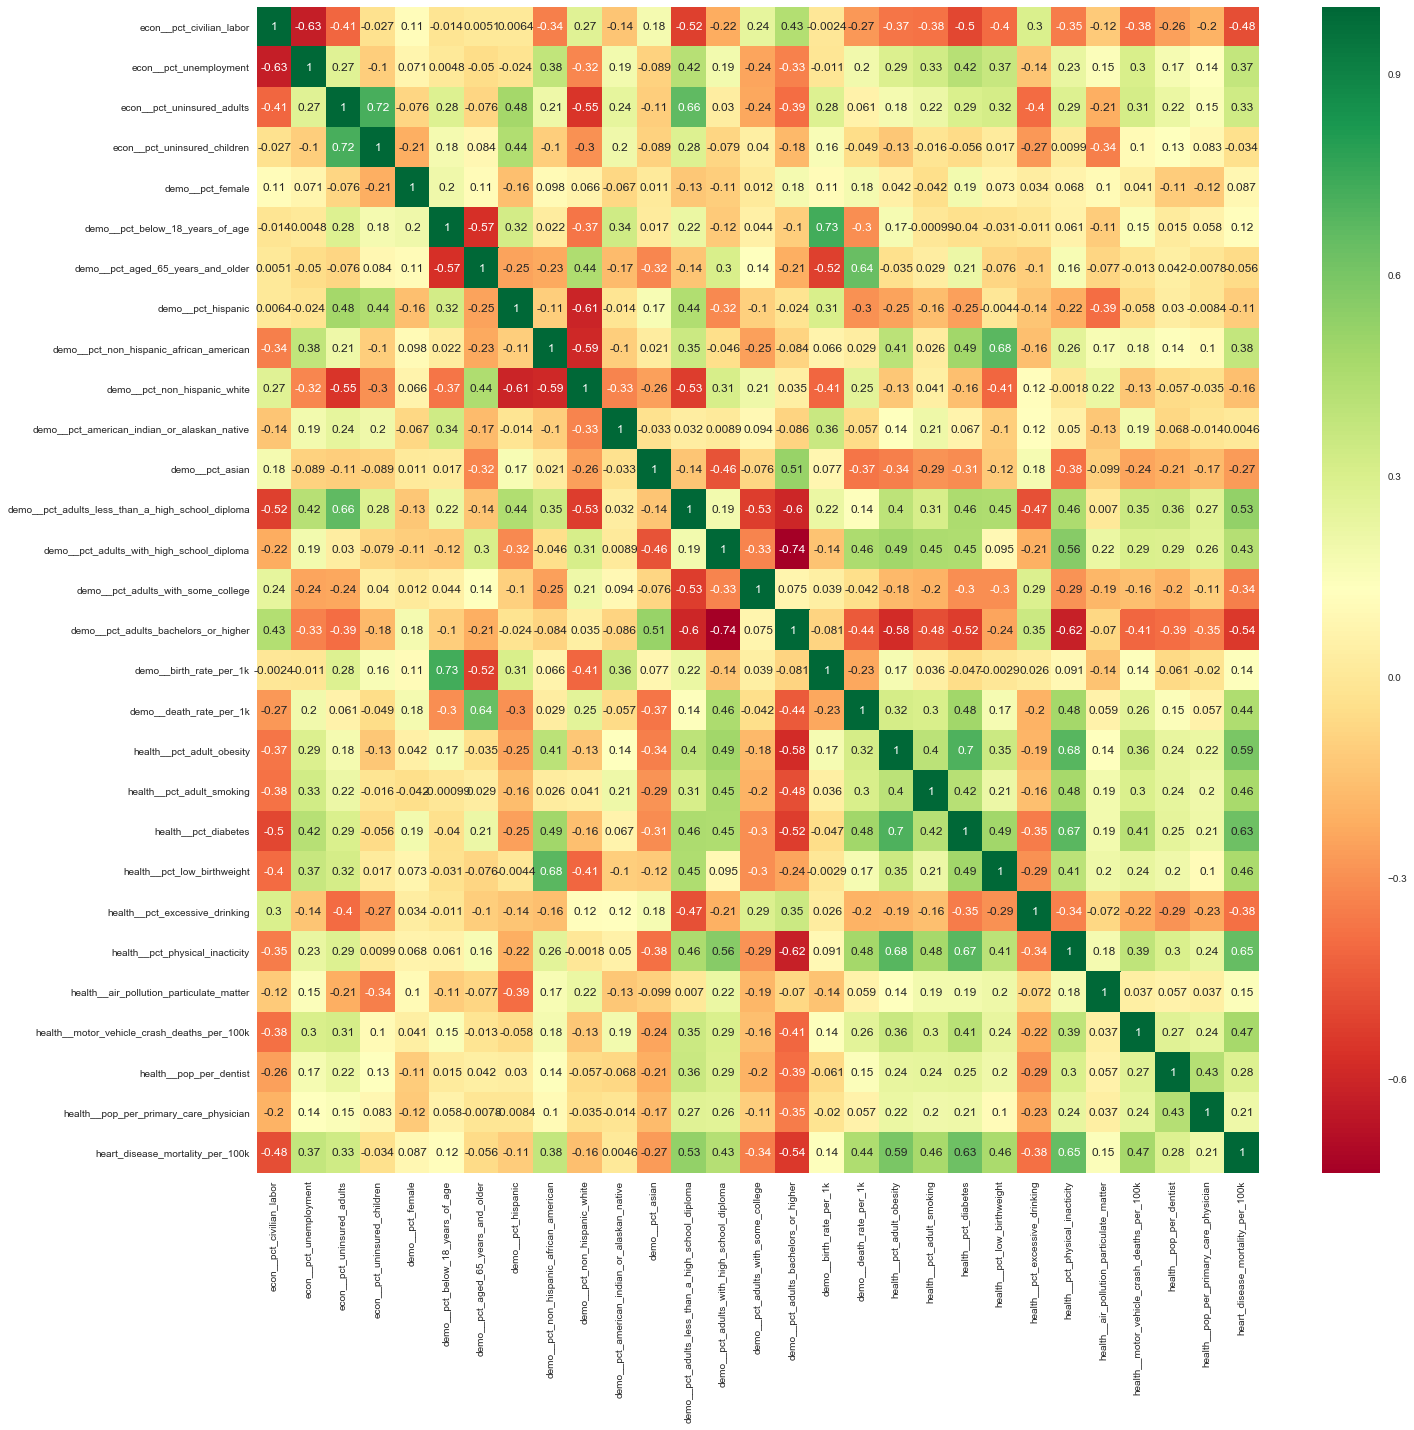

In [615]:
X_num=X.select_dtypes(exclude=['object'])
def heart_corr(data):
    plt.figure(figsize=(20,20))
    correlation = data.corr(method='pearson')
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

    
heart_corr(X.iloc[:,1:])

## order corr by importance

In [616]:
X_corr = X_num.corr()['heart_disease_mortality_per_100k'][X_num.corr()['heart_disease_mortality_per_100k'] < 1].abs()
X_corr.sort_values(ascending=False)
#X_corr.head()

health__pct_physical_inacticity                     0.650305
health__pct_diabetes                                0.631765
health__pct_adult_obesity                           0.593775
demo__pct_adults_bachelors_or_higher                0.540589
demo__pct_adults_less_than_a_high_school_diploma    0.526574
econ__pct_civilian_labor                            0.475507
health__motor_vehicle_crash_deaths_per_100k         0.471516
health__pct_adult_smoking                           0.463513
health__pct_low_birthweight                         0.460694
demo__death_rate_per_1k                             0.443405
demo__pct_adults_with_high_school_diploma           0.427714
health__pct_excessive_drinking                      0.380403
demo__pct_non_hispanic_african_american             0.375385
econ__pct_unemployment                              0.374975
demo__pct_adults_with_some_college                  0.340639
econ__pct_uninsured_adults                          0.334217
health__pop_per_dentist 

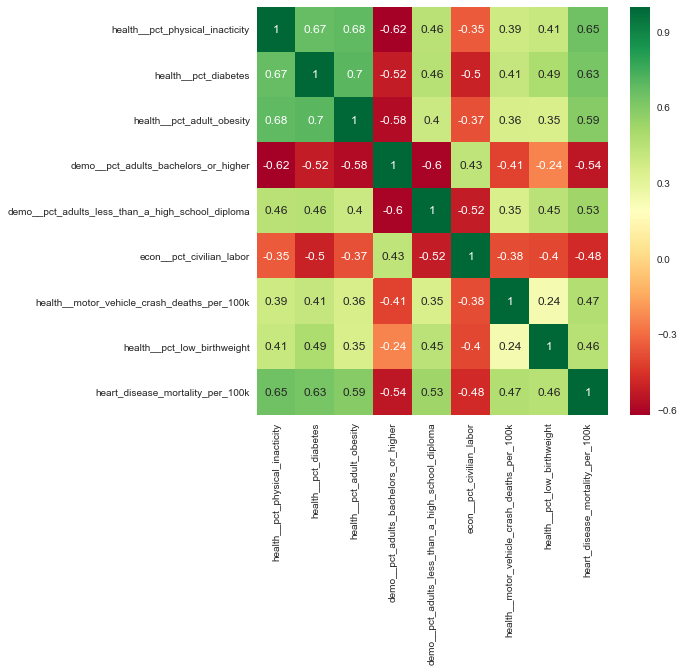

In [617]:
heart=X.loc[:,['health__pct_physical_inacticity','health__pct_diabetes','health__pct_adult_obesity','demo__pct_adults_bachelors_or_higher',
              'demo__pct_adults_less_than_a_high_school_diploma','econ__pct_civilian_labor','health__motor_vehicle_crash_deaths_per_100k','health__pct_low_birthweight',
              'heart_disease_mortality_per_100k']]

def heart_corr(data):
    plt.figure(figsize=(7,7))
    correlation = data.corr(method='pearson')
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

    
heart_corr(heart)

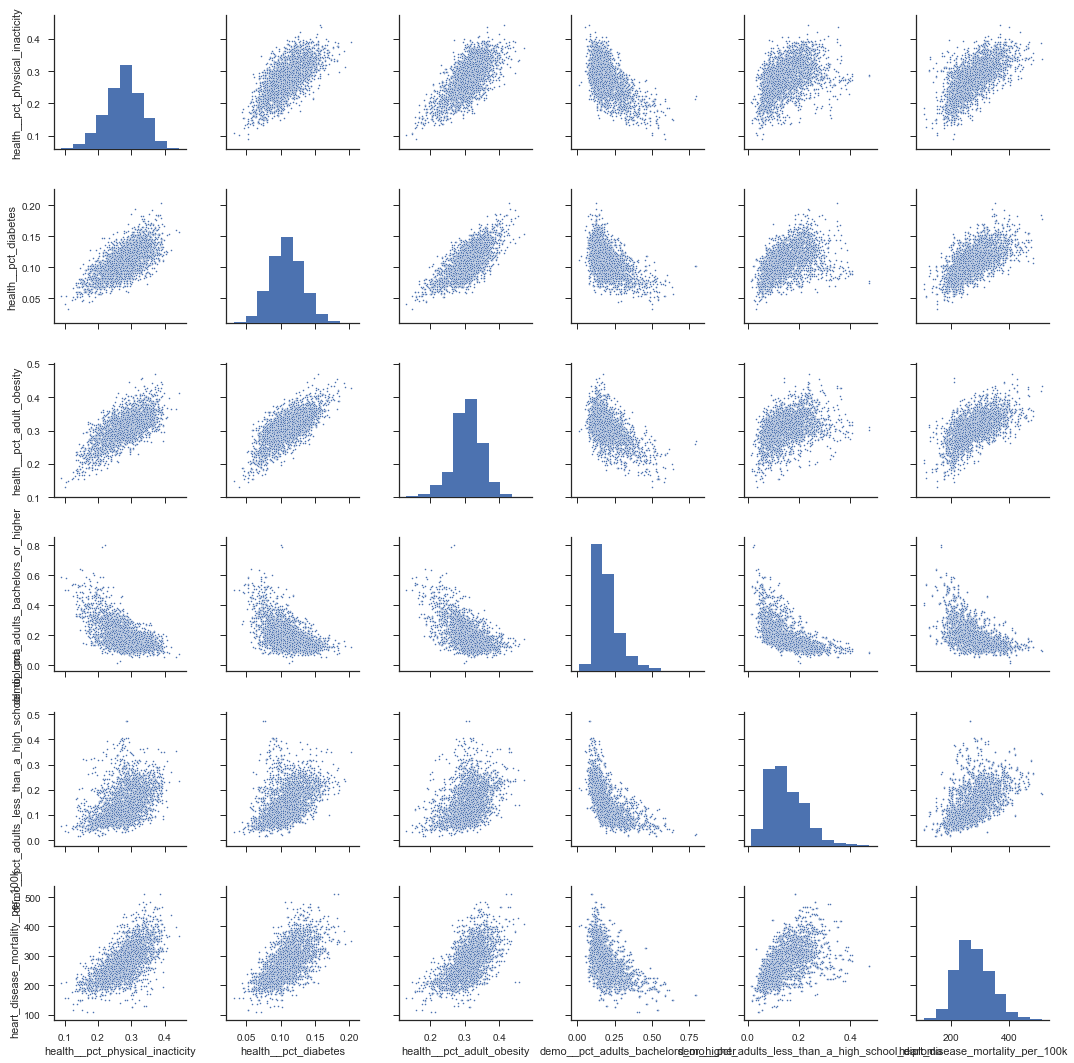

In [618]:
heart2=X.loc[:,['health__pct_physical_inacticity','health__pct_diabetes','health__pct_adult_obesity','demo__pct_adults_bachelors_or_higher',
              'demo__pct_adults_less_than_a_high_school_diploma',
              'heart_disease_mortality_per_100k']]
sns.set(style="ticks", color_codes=True)
g=sns.pairplot(heart2,plot_kws={"s": 3})

plt.subplots_adjust(hspace=0.3, wspace=0.3)

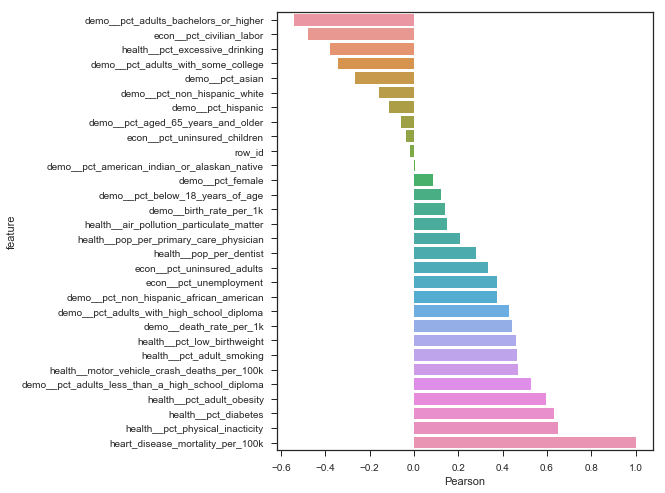

In [619]:
numeric = [f for f in X.columns if X.dtypes[f] != 'object'] #define numeric data
# qual_encoded = []
# for q in categorical:  
#     encode(X, q)
#     qual_encoded.append(q)
# print(qual_encoded)


def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['Pearson'] = [frame[f].corr(frame['heart_disease_mortality_per_100k'], 'pearson') for f in features]
    spr = spr.sort_values('Pearson')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='Pearson', orient='h')

features = numeric
#features = numeric + qual_encoded
spearman(X, features)

In [620]:
# simplify labels
X['area__rucc']=X['area__rucc'].map({'Metro - Counties in metro areas of 1 million population or more':'Metro_1',
                                                          'Metro - Counties in metro areas of fewer than 250,000 population':'Metro_3',
                                                          'Metro - Counties in metro areas of 250,000 to 1 million population':'Metro_2',
                                                          'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area':'Nonmetro_6',
                                                          'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area':'Nonmetro_7',
                                                          'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area':'Nonmetro_4',
                                                          'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area':'Nonmetro_9',
                                                          'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area':'Nonmetro_8',
                                                          'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area':'Nonmetro_5'})

In [621]:
X['area__urban_influence'] = X['area__urban_influence'].map({'Small-in a metro area with fewer than 1 million residents':'2',
                                                        'Large-in a metro area with at least 1 million residents or more':'1',
                                                        'Noncore adjacent to a small metro with town of at least 2,500 residents':'6',
                                                        'Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents':'11',
                                                        'Micropolitan adjacent to a small metro area':'5',
                                                       'Noncore adjacent to a large metro area':'4','Micropolitan not adjacent to a metro area':'8',
                                                       'Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents':'12',
                                                       'Noncore adjacent to micro area and does not contain a town of at least 2,500 residents':'10',
                                                       'Micropolitan adjacent to a large metro area':'3',
                                                        'Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents':'7',
                                                       'Noncore adjacent to micro area and contains a town of 2,500-19,999 residents':'13'})
                                            

In [471]:
#X.dtypes
X.shape

(3196, 34)

In [622]:
X.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
0,0,Metro_3,2,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,...,0.131,0.089,0.000,0.332,13.0,15.09,1650.0,1489.0,a,312
1,1,Metro_3,2,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,...,0.090,0.082,0.181,0.265,10.0,19.79,2010.0,2480.0,a,257
2,4,Metro_1,1,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,...,0.084,0.098,0.195,0.209,10.0,3.14,629.0,690.0,b,195
3,5,Nonmetro_6,6,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,...,0.104,0.058,0.000,0.238,13.0,0.00,1810.0,6630.0,b,218
4,6,Nonmetro_7,11,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,...,0.137,0.070,0.194,0.290,9.0,29.39,3489.0,2590.0,a,355


# Test data

In [472]:
X_test=test_values.copy()

In [473]:
# checK rest of nulls
def show_missing():
    missing = X_test.columns[X_test.isnull().any()].tolist()
    return missing
#show_missing()

In [474]:
print('Missing Data Count')
print(X_test[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*40)
print(round(X_test[show_missing()].isnull().sum().sort_values(ascending = False)/len(X_test)*100,2))

Missing Data Count
health__homicides_per_100k                     1830
health__pct_excessive_drinking                  860
health__pct_adult_smoking                       402
health__motor_vehicle_crash_deaths_per_100k     345
health__pop_per_dentist                         198
health__pop_per_primary_care_physician          184
health__pct_low_birthweight                     147
health__air_pollution_particulate_matter         38
demo__pct_non_hispanic_african_american           8
econ__pct_uninsured_children                      8
demo__pct_female                                  8
demo__pct_below_18_years_of_age                   8
demo__pct_aged_65_years_and_older                 8
demo__pct_hispanic                                8
health__pct_adult_obesity                         8
demo__pct_non_hispanic_white                      8
demo__pct_american_indian_or_alaskan_native       8
demo__pct_asian                                   8
health__pct_diabetes                         

In [475]:
### NaNs 'health__pct_excessive_drinking'
X_test['health__pct_excessive_drinking']=X_test['health__pct_excessive_drinking'].fillna(0)

In [476]:
### NaNs 'health__pct_adult_smoking'
imp=Imputer(missing_values='NaN',strategy='most_frequent',axis=0)
imp.fit(X_test[['health__pct_adult_smoking']])
X_test['health__pct_adult_smoking']=imp.transform(X_test[['health__pct_adult_smoking']]).ravel()

In [477]:
### NaNs 'health__motor_vehicle_crash_deaths_per_100k'
X_test['health__motor_vehicle_crash_deaths_per_100k']=X_test['health__motor_vehicle_crash_deaths_per_100k'].fillna(0)

In [478]:
### NaNs 'health__pct_low_birthweight'
imp=Imputer(missing_values='NaN',strategy='most_frequent',axis=0)
imp.fit(X_test[['health__pct_low_birthweight']])
X_test['health__pct_low_birthweight']=imp.transform(X_test[['health__pct_low_birthweight']]).ravel()

In [479]:
### NaNs 'health__pop_per_dentist' & NaNs 'health__pop_per_primary_care_physician'
X_test['health__pop_per_dentist']=X_test['health__pop_per_dentist'].fillna(method='bfill')
X_test['health__pop_per_primary_care_physician']=X_test['health__pop_per_primary_care_physician'].fillna(method='bfill')

In [480]:
### NaNs 'health__air_pollution_particulate_matter'
imp=Imputer(missing_values='NaN',strategy='median',axis=0)
imp.fit(X_test[['health__air_pollution_particulate_matter']])
X_test['health__air_pollution_particulate_matter']=imp.transform(X_test[['health__air_pollution_particulate_matter']]).ravel()

In [481]:
# remove 'health__homicides_per_100k'
X_test_hom=X_test.copy()
X_test_hom['health__homicides_per_100k']=X_test_hom['health__homicides_per_100k'].fillna(0)

In [482]:
# remove 'health__homicides_per_100k'
X_test=X_test.drop(labels=['health__homicides_per_100k'],axis=1)

In [483]:
# fill rest with mean (can't remove rows here)
X_test=X_test.fillna(X_test.mean())

In [484]:
X_test_hom=X_test_hom.fillna(X_test_hom.mean())

In [485]:
# checK rest of nulls
def show_missing():
    missing = X_test.columns[X_test.isnull().any()].tolist()
    return missing
#show_missing()

In [486]:
print('Missing Data Count')
print(X_test[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*40)
print(round(X_test[show_missing()].isnull().sum().sort_values(ascending = False)/len(X_test)*100,2))

Missing Data Count
Series([], dtype: float64)
--------------------------------------------------------------------------------
Series([], dtype: float64)


In [487]:
X_test['area__rucc']=X_test['area__rucc'].map({'Metro - Counties in metro areas of 1 million population or more':'Metro_1',
                                                          'Metro - Counties in metro areas of fewer than 250,000 population':'Metro_3',
                                                          'Metro - Counties in metro areas of 250,000 to 1 million population':'Metro_2',
                                                          'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area':'Nonmetro_6',
                                                          'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area':'Nonmetro_7',
                                                          'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area':'Nonmetro_4',
                                                          'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area':'Nonmetro_9',
                                                          'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area':'Nonmetro_8',
                                                          'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area':'Nonmetro_5'})

In [488]:
X_test['area__urban_influence'] = X_test['area__urban_influence'].map({'Small-in a metro area with fewer than 1 million residents':'2',
                                                        'Large-in a metro area with at least 1 million residents or more':'1',
                                                        'Noncore adjacent to a small metro with town of at least 2,500 residents':'6',
                                                        'Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents':'11',
                                                        'Micropolitan adjacent to a small metro area':'5',
                                                       'Noncore adjacent to a large metro area':'4','Micropolitan not adjacent to a metro area':'8',
                                                       'Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents':'12',
                                                       'Noncore adjacent to micro area and does not contain a town of at least 2,500 residents':'10',
                                                       'Micropolitan adjacent to a large metro area':'3',
                                                        'Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents':'7',
                                                       'Noncore adjacent to micro area and contains a town of 2,500-19,999 residents':'13'})
                                            

In [489]:
X_test.shape
X_test.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
0,2,Nonmetro_4,3,Recreation,0.469,0.070,0.211,0.156,0.499,0.184,...,0.166,0.078,0.079,0.217,0.162,11.0,12.67,1569.0,1559.0,a
1,3,Metro_1,1,Nonspecialized,0.509,0.061,0.182,0.056,0.514,0.211,...,0.172,0.099,0.078,0.183,0.269,10.0,5.94,1709.0,1069.0,a
2,7,Metro_3,2,Nonspecialized,0.479,0.042,0.294,0.131,0.514,0.245,...,0.184,0.094,0.078,0.105,0.275,10.0,19.87,1789.0,1990.0,a
3,9,Nonmetro_6,5,Nonspecialized,0.444,0.058,0.142,0.032,0.487,0.193,...,0.281,0.098,0.088,0.000,0.273,12.0,15.36,2860.0,2509.0,b
4,12,Nonmetro_6,6,Mining-dependent,0.395,0.042,0.299,0.179,0.514,0.277,...,0.205,0.103,0.131,0.000,0.263,11.0,0.00,4639.0,2189.0,b


# Categorical

## check which categorical features have a stronger influence in heart rate mortality

In [582]:
from scipy import stats
categorical = [f for f in X.columns if X.dtypes[f] == 'object'] # define categorical data


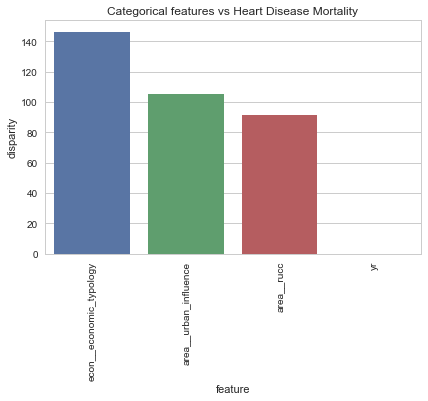

In [583]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = categorical
    pvals = []
    for c in categorical:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['heart_disease_mortality_per_100k'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')


a = anova(X)
a['disparity'] = np.log(1./a['pval'].values)
ax=sns.barplot(data=a, x='feature', y='disparity')
ax.set(title='Categorical features vs Heart Disease Mortality')
x=plt.xticks(rotation=90)

[Text(0,0,'Metro_3'),
 Text(0,0,'Metro_1'),
 Text(0,0,'Nonmetro_6'),
 Text(0,0,'Nonmetro_7'),
 Text(0,0,'Nonmetro_4'),
 Text(0,0,'Metro_2'),
 Text(0,0,'Nonmetro_9'),
 Text(0,0,'Nonmetro_8'),
 Text(0,0,'Nonmetro_5')]

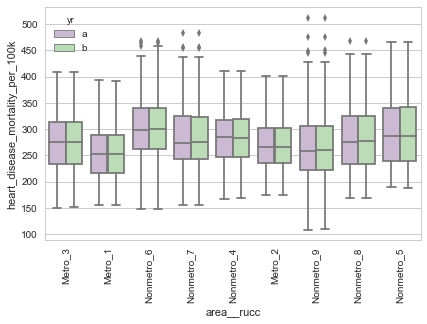

In [492]:
import seaborn as sns
sns.set(style="whitegrid")

ax=sns.boxplot(x="area__rucc", y="heart_disease_mortality_per_100k", hue="yr", data=X, palette="PRGn")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

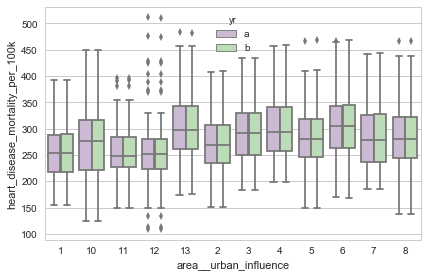

In [493]:
sns.boxplot(x="area__urban_influence", y="heart_disease_mortality_per_100k", hue="yr", data=X, palette="PRGn")

[Text(0,0,'Manufacturing-dependent'),
 Text(0,0,'Mining-dependent'),
 Text(0,0,'Nonspecialized'),
 Text(0,0,'Federal/State government-dependent'),
 Text(0,0,'Farm-dependent'),
 Text(0,0,'Recreation')]

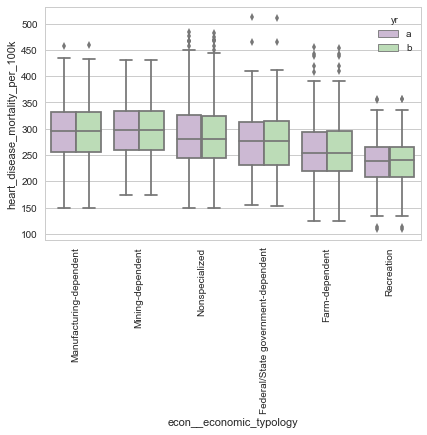

In [494]:
ax=sns.boxplot(x="econ__economic_typology", y="heart_disease_mortality_per_100k", hue="yr", data=X, palette="PRGn")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [495]:
metro=X.set_index('area__rucc')
Metro=metro.loc[['Metro_1','Metro_2','Metro_3']]
Metro=Metro.reset_index()
#Metro.head()

In [496]:
nonmetro=X.set_index('area__rucc')
NonMetro=nonmetro.loc[['Nonmetro_4','Nonmetro_5','Nonmetro_6','Nonmetro_7','Nonmetro_8','Nonmetro_9']]
NonMetro=NonMetro.reset_index()
#NonMetro.head()

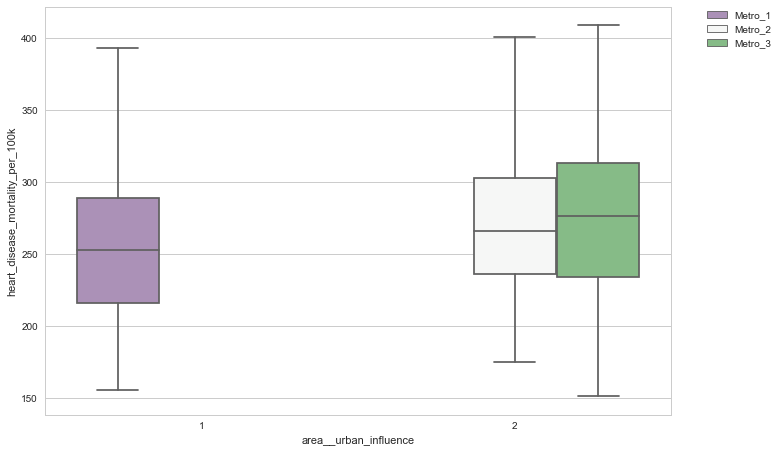

In [497]:
fig, ax = plt.subplots()
#plt.figure(figsize=(15,8))
fig.set_size_inches(10, 7)
ax=sns.boxplot(x="area__urban_influence", y="heart_disease_mortality_per_100k",hue='area__rucc' ,data=Metro, palette="PRGn")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

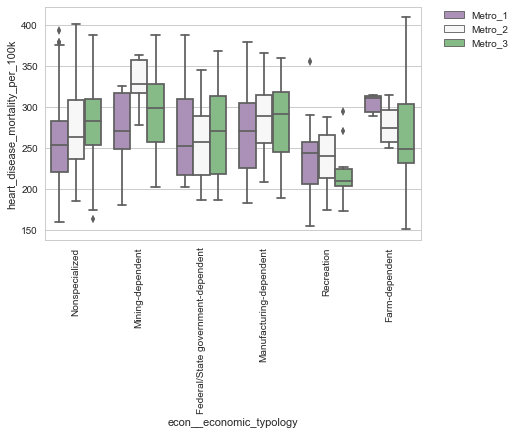

In [498]:
ax=sns.boxplot(x="econ__economic_typology", y="heart_disease_mortality_per_100k", hue="area__rucc", data=Metro, palette="PRGn")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

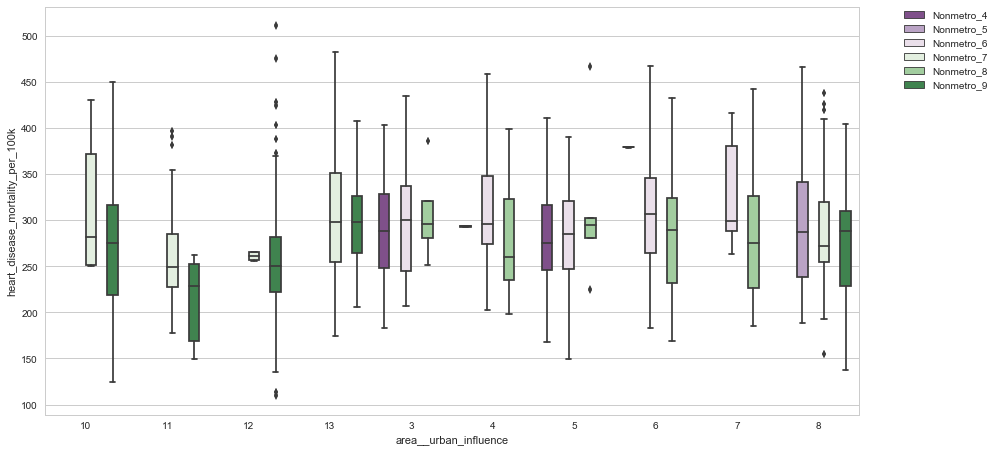

In [499]:
fig, ax = plt.subplots()
#plt.figure(figsize=(15,8))
fig.set_size_inches(13, 7)
ax=sns.boxplot(x="area__urban_influence", y="heart_disease_mortality_per_100k",hue='area__rucc' ,data=NonMetro, palette="PRGn")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

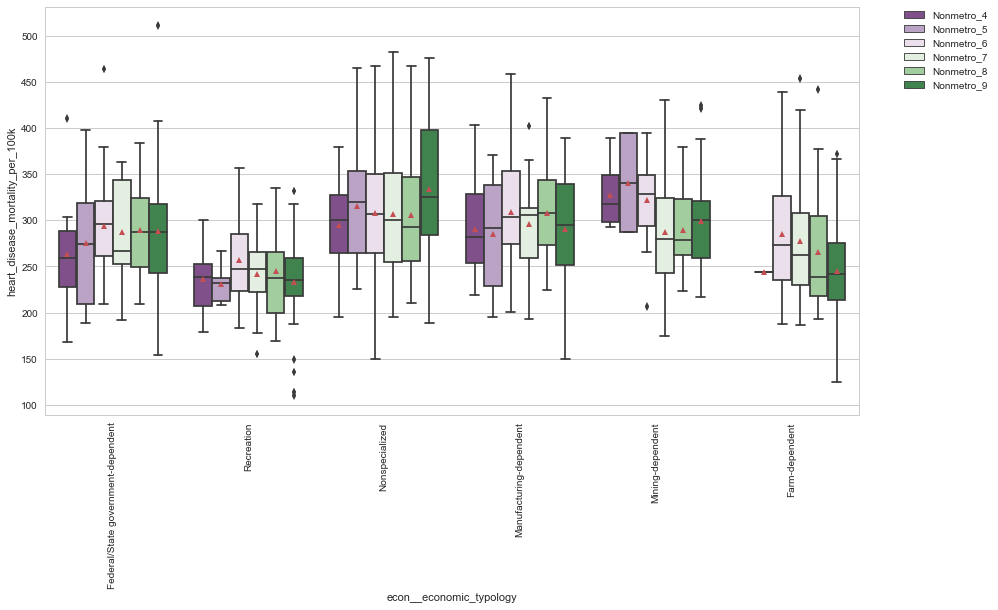

In [500]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 7)
ax=sns.boxplot(x="econ__economic_typology", y="heart_disease_mortality_per_100k", hue="area__rucc", data=NonMetro, palette="PRGn",showmeans=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Target

C:\Users\teres\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


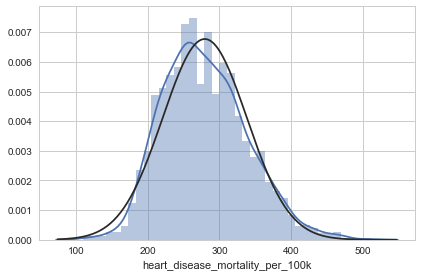

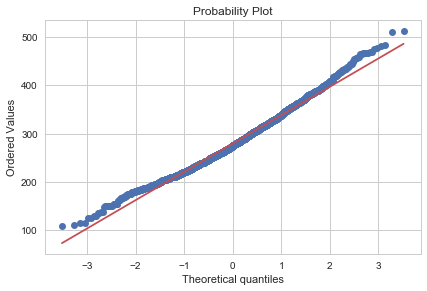

In [501]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(X['heart_disease_mortality_per_100k'],fit=norm);
fig = plt.figure()
res = stats.probplot(X['heart_disease_mortality_per_100k'], plot=plt)

# ---------------------------------------------------------------------------------------------------------------

# Model

In [502]:
# get dummies for the data, set row_id as index and remove traget from data train
X_dummies=pd.get_dummies(X)
X_dummies=X_dummies.set_index('row_id')
X_dummies=X_dummies.drop(labels=['heart_disease_mortality_per_100k'],axis=1)
print(X_dummies.shape)

(3196, 57)


In [510]:
X_dummies_hom=pd.get_dummies(X_hom)
X_dummies_hom=X_dummies_hom.set_index('row_id')
X_dummies_hom=X_dummies_hom.drop(labels=['heart_disease_mortality_per_100k'],axis=1)
print(X_dummies_hom.shape)

(3196, 58)


In [503]:
#X_dummies2=X_dummies.drop(labels=['demo__death_rate_per_1k'],axis=1)

In [504]:
# define target

target=X.loc[:,['row_id','heart_disease_mortality_per_100k']]
target=target.set_index('row_id')
print(target.shape)
#target.head()

(3196, 1)


In [505]:
# test data
X_test=X_test.set_index('row_id')
X_test_dummies=pd.get_dummies(X_test)
print(X_test_dummies.shape)

(3080, 57)


In [506]:
#X_test_dummies2=X_dummies.drop(labels=['demo__death_rate_per_1k'],axis=1)

In [560]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_dummies,target.values.ravel(),test_size=0.25,random_state=100)

In [561]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 100, 'max_depth': 4,'max_features':8,
        'learning_rate': 0.1,'min_samples_split':4,'min_samples_leaf':4,'random_state':102}

clf = GradientBoostingRegressor(**params).fit(X_train, y_train)

y_pred_gbrt=clf.predict(X_test)

mse = mean_squared_error(y_test, clf.predict(X_test))
r2 = r2_score(y_test, clf.predict(X_test))

print("MSE: %.4f" % mse)
print("R2: %.4f" % r2)
print('RMSE_test',np.sqrt(mean_squared_error(y_test, y_pred_gbrt)))
print('RMSE_train',np.sqrt(mean_squared_error(y_train, clf.predict(X_train))))

MSE: 1006.0597
R2: 0.7103
RMSE_test 31.7184440267
RMSE_train 21.8797139329


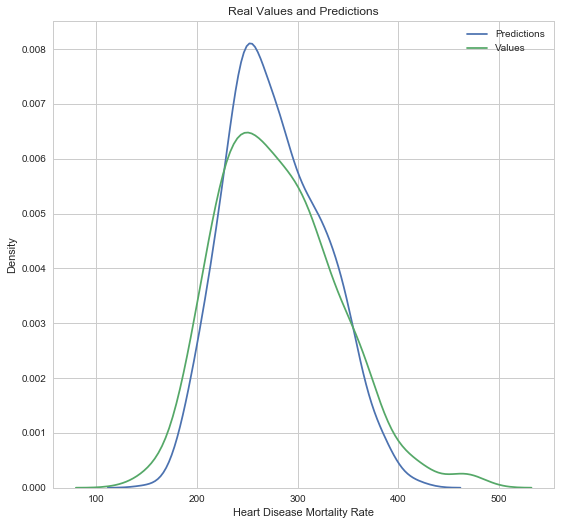

In [574]:
plt.figure(figsize=(8, 8))

# Density plot of the final predictions and the test values
sns.kdeplot(y_pred_gbrt, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Heart Disease Mortality Rate'); plt.ylabel('Density');
plt.title('Real Values and Predictions');

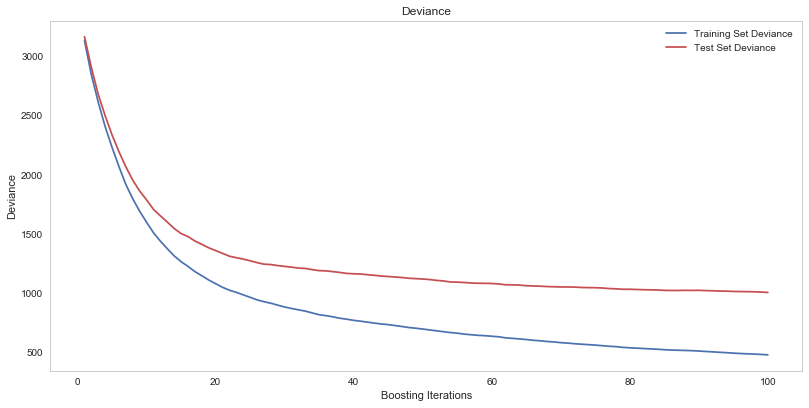

In [529]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
                label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
                label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.grid()

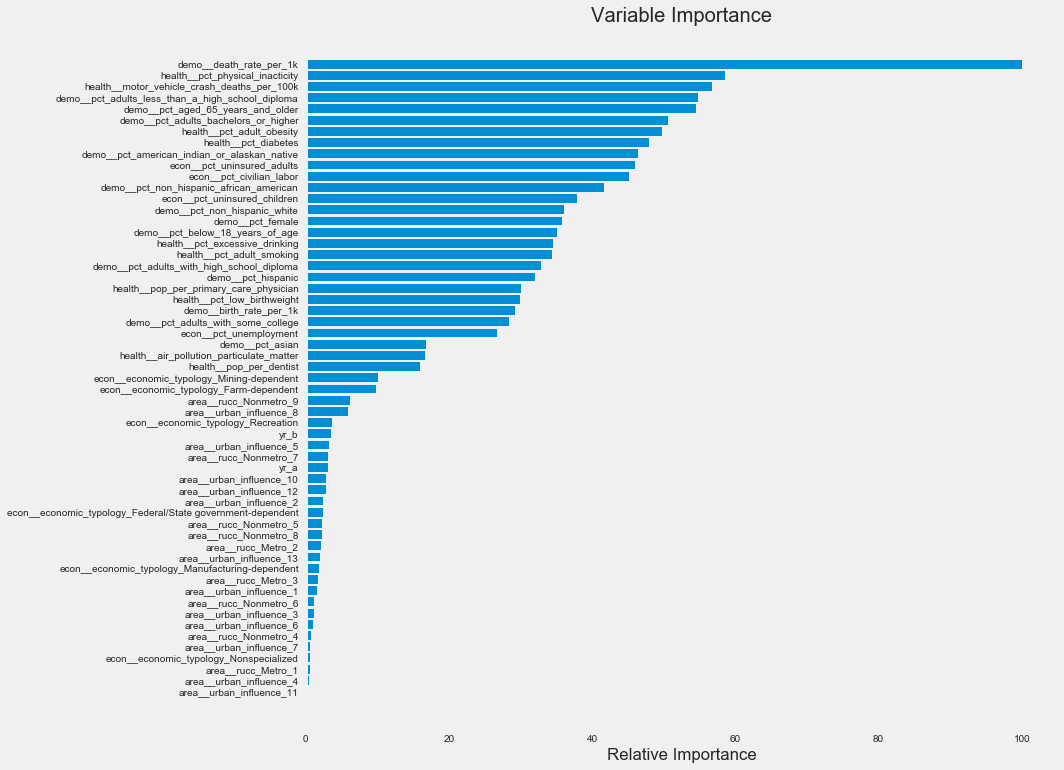

In [277]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 12))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_dummies.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.grid()
plt.show()

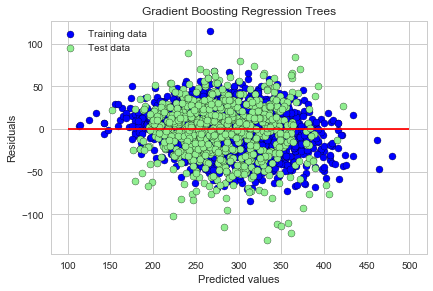

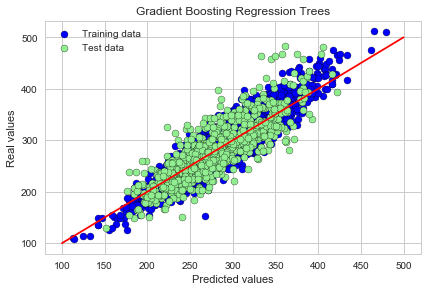

In [563]:
y_train_gbrt = clf.predict(X_train)
y_test_gbrt = clf.predict(X_test)

# Plot residuals
plt.scatter(y_train_gbrt, y_train_gbrt - y_train, c = "blue", marker = "o", label = "Training data",edgecolors='black')
plt.scatter(y_test_gbrt, y_test_gbrt - y_test, c = "lightgreen", marker = "o", label = "Test data",edgecolors='black')
plt.title("Gradient Boosting Regression Trees")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 100, xmax = 500, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_gbrt, y_train, c = "blue", marker = "o", label = "Training data", edgecolors='black')
plt.scatter(y_test_gbrt, y_test, c = "lightgreen", marker = "o", label = "Test data", edgecolors='black')
plt.title("Gradient Boosting Regression Trees")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([100, 500], [100, 500], c = "red")
plt.show()


In [564]:
# predict unseen
row_id_test=test_values['row_id']
y_new=clf.predict(X_test_dummies)

y_new_df=pd.DataFrame(y_new)
y_new_df.columns = y_new_df.columns.astype(str) # pass column label '0' to string
y_new_df=y_new_df.rename(columns={"0":"heart_disease_mortality_per_100k"})

df=pd.concat([row_id_test,y_new_df],axis=1)
df=pd.DataFrame(df).set_index('row_id')
df.heart_disease_mortality_per_100k=pd.to_numeric(df.heart_disease_mortality_per_100k.round(decimals=0),downcast='signed')
df.to_csv('ResultsGBT14.csv',sep=',')
#print(df)

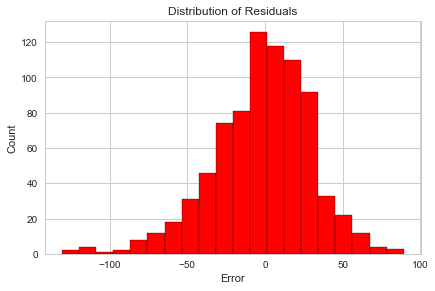

In [565]:
figsize = (6, 6)

# Calculate the residuals 
residuals = y_pred_gbrt - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

C:\Users\teres\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


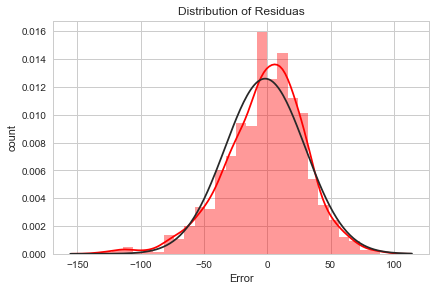

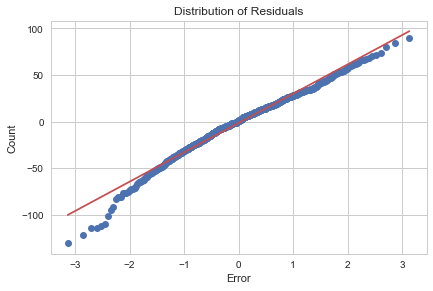

In [573]:
from scipy.stats import norm
from scipy import stats

residuals = y_pred_gbrt - y_test
ax=sns.distplot(residuals,fit=norm,color='red');
ax.set(xlabel='Error', ylabel='count',title='Distribution of Residuas')
fig = plt.figure()
res = stats.probplot(residuals, plot=plt)
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

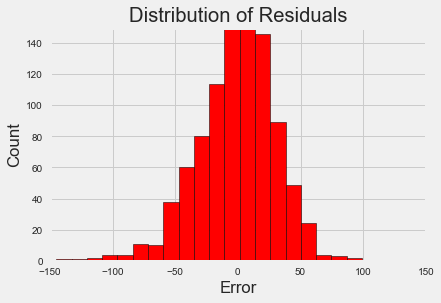

In [282]:
# Plot the residuals in a histogram
# Calculate the residuals 

residuals = y_pred_gbrt - y_test
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlim(-150,150)
plt.ylim(0,150)
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

In [198]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

X_train,X_test,y_train,y_test=train_test_split(X_dummies,target.values.ravel(),test_size=0.25,random_state=100)

In [191]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [192]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'mean_squared_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [193]:
# Fit on the training data
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.6min finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None], 'min_samples_leaf': [1, 2, 4, 6, 8], 'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='mean_squared_error', verbose=1)

In [194]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_loss,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
22,16.962071,0.035960,-806.391914,-0.004034,ls,5,None,8,2,1500,...,-723.590546,-0.002928,-885.894870,-0.004212,-816.089443,-0.005776,0.183558,0.002728,57.676156,0.001113
3,7.450906,0.013888,-820.145662,-39.748146,huber,5,None,8,6,500,...,-734.941422,-39.433704,-920.046471,-46.511764,-801.933701,-34.266844,0.141567,0.002871,66.288406,4.382546
21,2.978850,0.014136,-830.563452,-47.464024,huber,5,log2,4,6,500,...,-726.839769,-45.934217,-978.977747,-49.631679,-760.821223,-43.795314,0.036809,0.001336,97.800758,2.724179
16,9.029673,0.021576,-842.110659,-13.845832,ls,3,None,6,4,1500,...,-728.168320,-13.882685,-928.789104,-14.293066,-833.990654,-12.561566,0.086410,0.001588,73.828818,0.789146
20,14.837701,0.030504,-856.445686,-0.243945,huber,10,sqrt,1,6,500,...,-730.307783,-0.432089,-977.867698,-0.169352,-859.148095,-0.101919,0.199026,0.000822,87.539466,0.124443
8,27.160691,0.063488,-860.702858,-2.158086,huber,10,sqrt,2,6,1500,...,-757.751891,-1.002191,-956.977521,-2.224133,-865.839787,-3.368895,2.939793,0.008439,70.512704,0.839813
1,1.841522,0.006324,-866.797461,-66.230840,huber,10,sqrt,8,6,100,...,-751.142900,-69.654445,-1008.156060,-70.364704,-890.085241,-57.020561,0.043464,0.000215,95.238656,5.393768
7,2.893414,0.012648,-876.584318,-146.799204,ls,3,auto,6,4,500,...,-761.899104,-149.989270,-952.954498,-139.262233,-874.263440,-146.502932,0.022100,0.005016,71.816440,4.707157
13,5.735987,0.028768,-882.934507,-233.824139,lad,5,sqrt,1,10,1500,...,-782.371365,-230.017525,-1014.165303,-226.101355,-837.756102,-230.288089,0.020008,0.001264,85.984626,8.854422
4,23.783553,0.070432,-883.140570,-59.978149,lad,15,sqrt,6,6,900,...,-764.634397,-52.587979,-1012.193694,-65.686296,-929.806184,-58.893433,0.163953,0.009179,95.037946,4.899719


In [195]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1500, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [205]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_squared_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [206]:
# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.5min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

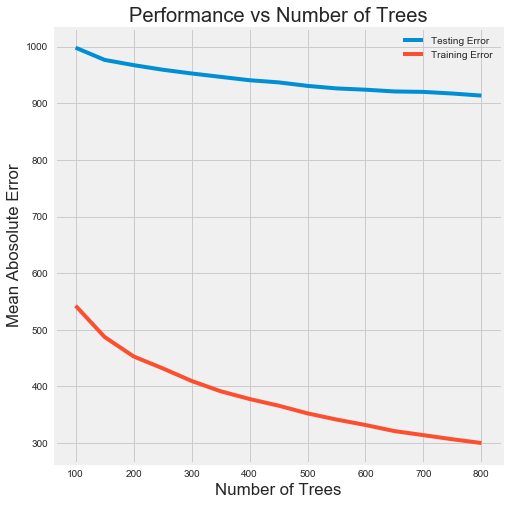

In [209]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
plt.figure(figsize=(8, 8))
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [ ]:
# Clearly overfitting!!

In [ ]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

In [ ]:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=800, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [ ]:
default_model.fit(X_train, y_train)

In [ ]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: RMSE = %0.4f.' % rmse(y_test, default_pred))
print('Final model performance on the test set:   RMSE = %0.4f.' % rmse(y_test, final_pred))